# Analysation of latency data
In this notebook we want to analyse all the latency data



### what do i want to analyse?
- distribution of latency
- correlation between input size and latency measures

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from utils import *
import pandas as pd
from pathlib import Path

## 1) Load Dataset

In [3]:
# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

# Find all files containing "raw" and ending with .csv in all subdirectories
raw_files = sorted(results_dir.glob('**/*raw*.csv'))

print(f"Found {len(stats_files)} stats CSV files and {len(raw_files)} raw CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Load all raw files into a dictionary of dataframes
raw_dfs = {}
for file_path in raw_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        raw_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\n✅ Loaded {len(stats_dfs)} stats dataframes and {len(raw_dfs)} raw dataframes ✅")

Found 27 stats CSV files and 27 raw CSV files:
✅ cloud/cloud_stats_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T0

In [ ]:
# raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45']

In [5]:
# Check the keys in raw_dfs
print("Available keys in raw_dfs:")
for key in raw_dfs.keys():
    print(key)

Available keys in raw_dfs:
cloud/cloud_raw_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38
cloud/cloud_raw_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00
cloud/cloud_raw_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39
cloud/cloud_raw_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33
cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54
cloud/cloud_raw_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00
cloud/cloud_raw_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02
cloud/cloud_raw_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T07-52-16
fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00
fabian/raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-06T10-14-33
fabia

## 2) Inference Time vs. Accuracy

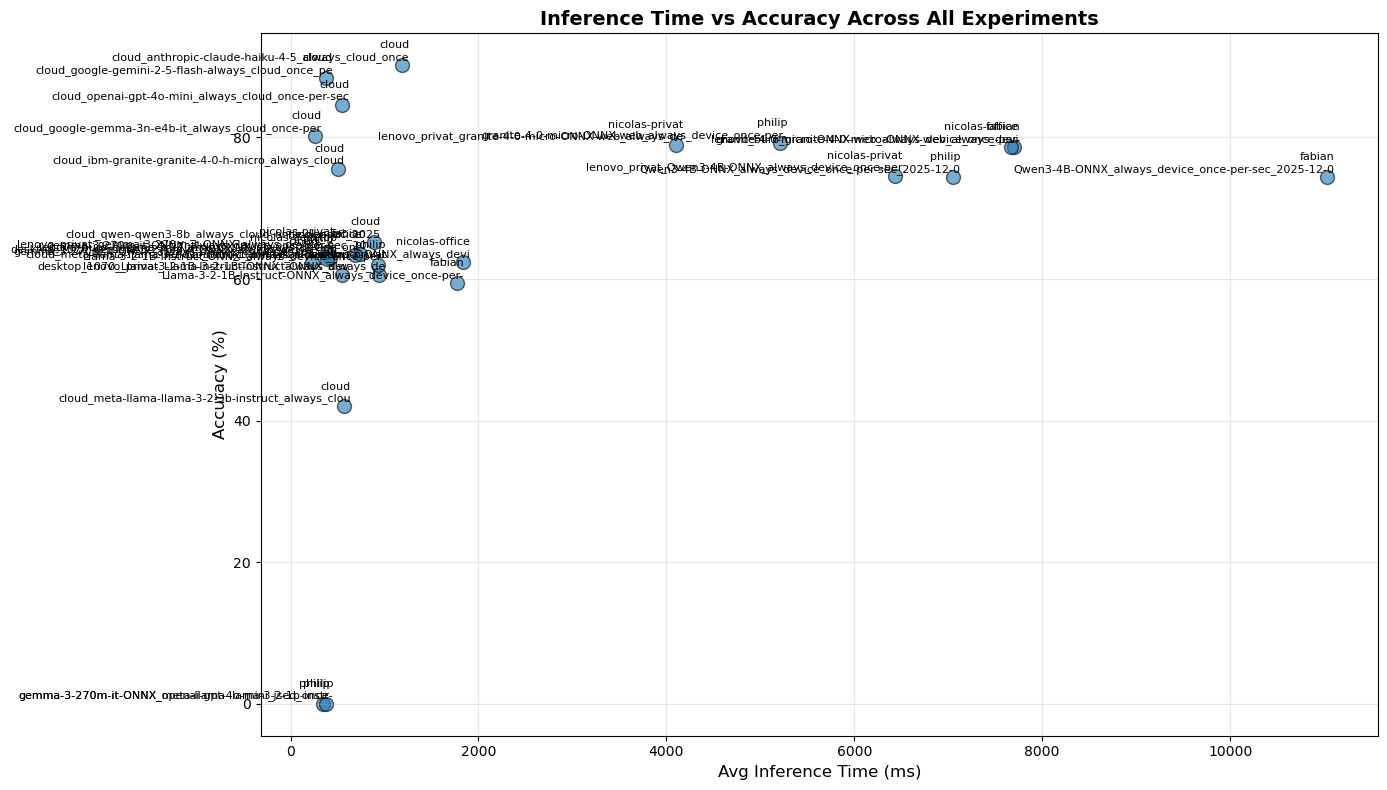

In [6]:
# Call the function with the stats_dfs dictionary
# TODO: shorten the labels (maybe just "granite micro" instead of ibm-granite-granite-4-0-h-micro). Would do this with a lookup table. Maybe add directly on data loading step.
# TODO: color the dots based on cloud vs. on device
# TODO: optional: make the size of the dots depending on the model size
scatterplot_inference_vs_accuracy(stats_dfs)

In [ ]:
# plot_time_measure_distributions(raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'], 'Llama Fabian')
# plot_time_measure_distributions(raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'], 'Llama Philip')
#plot_time_measure_distributions(raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'], 'Llama Nicolas Büro')


In [8]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
    raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34']
]

labels = ['gemma Fabian', 'gemma Philip', 'gemma Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

KeyError: 'nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34'

In [ ]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
    raw_dfs['nicolas-office/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'],
    raw_dfs['cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']
]

labels = ['Llama Fabian', 'Llama Philip', 'Llama Nicolas Büro', 'cloud']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

In [ ]:
# Prepare the data for plotting
experiment_data_granite = [
    raw_dfs['fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],
    # Updated key for Fabian
    raw_dfs['philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],
    # Correct key for Philip
    raw_dfs[
        'nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10']
    # Correct key for Nicolas
]

labels_granite = ['Granite Fabian', 'Granite Philip', 'Granite Nicolas Büro']

# Plot time measure distributions for Granite experiments
plot_time_measures_overlaid(experiment_data_granite, labels_granite)

# Plot inference vs input character amount for Granite experiments
plot_characters_vs_inference_time(experiment_data_granite, labels_granite)

## n) Analyisis of Latency per Model and Device
This analyiss is used to show the mean and median latency as well as the variance in latency for the on device models of different configurations. Those numbers can be copied to the report.

In [ ]:
# filter raw_df such that only entries with fabian in the path are kept
fabian_raw_dfs = {key: df for key, df in raw_dfs.items() if 'fabian' in key}

In [ ]:
def analyze_latency_statistics_for_one_device(name: str, route: str = 'device') -> pd.DataFrame:
    # filter all the raw dataframes which contain name in their key (e.g. 'fabian' for all datasets from fabian)
    subset_raw_df = {key: df for key, df in raw_dfs.items() if name in key}

    latency_stats = {}
    for key, df in subset_raw_df.items():
        if 'inference_time_ms' not in df.columns:
            continue

        series = df['inference_time_ms'].dropna()
        mean_latency = series.mean()
        median_latency = series.median()
        std_latency = series.std()
        q25 = series.quantile(0.25)
        q75 = series.quantile(0.75)
        iqr_latency = q75 - q25

        mean_accuracy = df['exact_match'].mean() if 'exact_match' in df.columns else None
        device_model = df['device_model'][0]
        cloud_model = df['cloud_model'][0]

        model_name = cloud_model if route == 'cloud' else device_model

        latency_stats[model_name] = {
            'mean_latency_ms': round(mean_latency, 2),
            'median_latency_ms': round(median_latency, 2),
            'std_latency_ms': round(std_latency, 2),
            'iqr_latency_ms': round(iqr_latency, 2),
            'q25_latency_ms': round(q25, 2),
            'q75_latency_ms': round(q75, 2),
            'mean_accuracy': round(mean_accuracy, 2),
            'dataset_name': key
        }

    # convert to a dataframe
    return pd.DataFrame.from_dict(latency_stats, orient='index')


In [ ]:
# print the dataframe
analyze_latency_statistics_for_one_device('fabian')

In [ ]:
analyze_latency_statistics_for_one_device('philip')

In [ ]:
analyze_latency_statistics_for_one_device('nicolas-privat')

In [ ]:
analyze_latency_statistics_for_one_device('nicolas-office')

## 5) Prompt Characters vs. Latency Analysis
This analysis is used to show the correlation between input size (in tokens) and latency for different models and devices.

In [ ]:
# Prepare the data for plotting
experiment_data = [
    [
        raw_dfs['fabian\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
        raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-05T08-43-10'],
        raw_dfs[
            'cloud\\cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']
    ],
    [
        raw_dfs['fabian\\raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],
        raw_dfs['philip\\raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-05T09-19-31'],
        raw_dfs[
            'cloud\\cloud_raw_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33']
    ],
    [
        raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
        raw_dfs['philip\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-05T08-27-21']
    ],
    [
        raw_dfs['fabian\\raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-06T10-14-33'],
        raw_dfs['philip\\raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-05T10-40-39']
    ]

]

labels = [
    ['Asus Zenbook', 'Macbook Air', 'Lenovo', 'Cloud'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo', 'Cloud'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo']
]

model_names = [
    'Llama-3-2-1B-Instruct-ONNX',
    'Granite-4-0-micro-ONNX-web',
    'Gemma-3-270m-it-ONNX',
    'Qwen3-4B-ONNX'
]


# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels, model_names)

In [ ]:
print("Correlation Analysis between Input Characters and Inference Time for Llama:")
calc_correlation_characters_inference(experiment_data[0], labels[0])

In [ ]:
print("Correlation Analysis between Input Characters and Inference Time for Granite:")
calc_correlation_characters_inference(experiment_data[1], labels[1])

In [ ]:
print("Correlation Analysis between Input Characters and Inference Time for Gemma:")
calc_correlation_characters_inference(experiment_data[2], labels[2])

In [ ]:
print("Correlation Analysis between Input Characters and Inference Time for Qwen:")
calc_correlation_characters_inference(experiment_data[3], labels[3])

## 6) Distribution of Inference Time
This section explores how the inference time is distributed for different models and devices.

In [ ]:
plot_inference_time_distribution(experiment_data, labels, model_names)

## 7) Analysis of Warmup Effects
This section analyzes whether there are warmup effects in the latency data, i.e., whether the latency decreases over time as the model "warms up".

In [ ]:
# select from each experiment the first 50 and last 50 samples
def analyze_warmup_effects(experiment_data, labels):
    for data_list, label_list in zip(experiment_data, labels):
        for df, label in zip(data_list, label_list):
            # Sort by job_start_ts to ensure chronological order
            df_sorted = df.sort_values('job_start_ts').reset_index(drop=True)
            first = df_sorted['inference_time_ms'].iloc[0]
            second = df_sorted['inference_time_ms'].iloc[1]
            diff_first_two = first - second

            # get reduction of time in percentage
            reduction_percentage = (diff_first_two / first) * 100

            print(f"{label}: Mean Inference Time - Difference in first two items: {diff_first_two:.2f} ms, {reduction_percentage:2f}% reduction")

In [ ]:
analyze_warmup_effects(experiment_data, labels)

In [ ]:
plot_warm_up_phase(experiment_data, labels, model_names)

In [ ]:
experiment_data[1][3]